<a href="https://colab.research.google.com/github/mohammadehsanii/Voice_Detection/blob/main/dataMining1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Mining for Turkish Music Emotion Dataset**

### Prof. Giuseppe Longo and Prof. Roberta Siciliano.

*   Rabia Simal Capar
*   Hasan Tohidi
*   Mohammad Ehsani



## **Introduction**
---


The project is about predicting the respective emotional class of turkish music samples.

The dataset contains acoustic features and their related emotions: happy, sad, angry and relaxing.

The script deals with exploring the dataset, handling missing values, visualizing important features, applying Principal Component Analysis (PCA), and building neural networks.

### importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
import joblib
import warnings
import tensorflow as tf


# Suppress warnings
warnings.filterwarnings('ignore')

In [2]:
#if you wanna run it with colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_directory = '/content/drive/My Drive/Acoustic_Features.csv'

# Load the dataset

raw_data = pd.read_csv(file_directory)

In [5]:
raw_data2 = raw_data.copy()

### *the shape and the dimension of our raw dataset*

In [6]:
raw_data.shape

(400, 51)

### *the preview of the dataset*

In [7]:
raw_data.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


### *the statistical  description of our dataset*

In [8]:
raw_data.describe()

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.134650,0.553605,7.145932,123.682020,2.456422,0.071890,0.488065,0.030465,0.178897,0.038307,...,0.354632,0.590975,0.342340,0.385620,0.328213,0.192997,-0.000157,1.762288,0.769690,0.966712
std,0.064368,0.050750,2.280145,34.234344,0.799262,0.537865,0.294607,0.275839,0.195230,0.203754,...,0.334976,0.357981,0.315808,0.348117,0.055520,0.047092,0.104743,0.930352,0.072107,0.003841
min,0.010000,0.302000,3.580000,48.284000,0.323000,-3.484000,-0.870000,-1.636000,-0.494000,-0.916000,...,0.000000,0.000000,0.000000,0.000000,0.112000,0.060000,-0.285000,0.187000,0.530000,0.939000
25%,0.085000,0.523000,5.859500,101.490250,1.948500,-0.262750,0.281250,-0.117000,0.061250,-0.078250,...,0.066750,0.264500,0.059500,0.060750,0.290750,0.160000,-0.058000,0.961000,0.725000,0.965000
50%,0.128000,0.553000,6.734000,120.132500,2.389500,0.068500,0.464500,0.044500,0.181000,0.049500,...,0.247000,0.612000,0.247000,0.296500,0.333000,0.190000,-0.002000,1.682000,0.786000,0.967000
75%,0.174000,0.583250,7.823500,148.986250,2.860250,0.413250,0.686000,0.198250,0.288500,0.151250,...,0.612000,1.000000,0.565250,0.670750,0.367250,0.226000,0.063250,2.243000,0.824000,0.969000
max,0.431000,0.703000,23.475000,195.026000,5.996000,1.937000,1.622000,1.126000,1.055000,0.799000,...,1.000000,1.000000,1.000000,1.000000,0.488000,0.340000,0.442000,4.486000,0.908000,0.977000


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

### *Categorical Variables*

In [10]:
# Categorical variable

categorical = [var for var in raw_data.columns if raw_data[var].dtype=='object']

print('There are {} categorical variable\n'.format(len(categorical)))

print('The categorical variables is :', categorical)

There are 1 categorical variable

The categorical variables is : ['Class']


### *Numerical Variables*

In [11]:
# Numerical variables

numerical = [var for var in raw_data.columns if raw_data[var].dtype in ['float64', 'int64']]

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are:', numerical)

There are 50 numerical variables

The numerical variables are: ['_RMSenergy_Mean', '_Lowenergy_Mean', '_Fluctuation_Mean', '_Tempo_Mean', '_MFCC_Mean_1', '_MFCC_Mean_2', '_MFCC_Mean_3', '_MFCC_Mean_4', '_MFCC_Mean_5', '_MFCC_Mean_6', '_MFCC_Mean_7', '_MFCC_Mean_8', '_MFCC_Mean_9', '_MFCC_Mean_10', '_MFCC_Mean_11', '_MFCC_Mean_12', '_MFCC_Mean_13', '_Roughness_Mean', '_Roughness_Slope', '_Zero-crossingrate_Mean', '_AttackTime_Mean', '_AttackTime_Slope', '_Rolloff_Mean', '_Eventdensity_Mean', '_Pulseclarity_Mean', '_Brightness_Mean', '_Spectralcentroid_Mean', '_Spectralspread_Mean', '_Spectralskewness_Mean', '_Spectralkurtosis_Mean', '_Spectralflatness_Mean', '_EntropyofSpectrum_Mean', '_Chromagram_Mean_1', '_Chromagram_Mean_2', '_Chromagram_Mean_3', '_Chromagram_Mean_4', '_Chromagram_Mean_5', '_Chromagram_Mean_6', '_Chromagram_Mean_7', '_Chromagram_Mean_8', '_Chromagram_Mean_9', '_Chromagram_Mean_10', '_Chromagram_Mean_11', '_Chromagram_Mean_12', '_HarmonicChangeDetectionFunction_Mean',

### *Visualizing the categorical and the numerical data distribution*

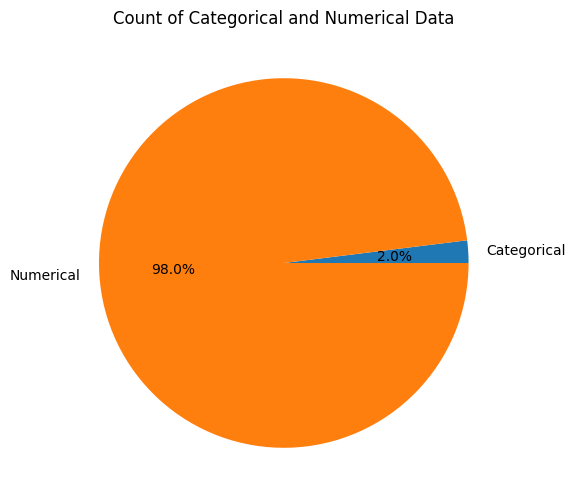

In [12]:
# Define categorical and numerical data
categorical_count = len(categorical)
numerical_count = len(numerical)

# Calculate total data points
total = categorical_count + numerical_count

# Calculate percentages
categorical_percent = (categorical_count / total) * 100
numerical_percent = (numerical_count / total) * 100

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie([categorical_percent, numerical_percent], labels=["Categorical", "Numerical"], autopct="%1.1f%%")
plt.title("Count of Categorical and Numerical Data")
plt.show()

## **Data Preparation**
---



### *Handling Missing Values*

In [13]:
# Handling Missing Values

data_type = pd.DataFrame(raw_data.dtypes , columns = ["Data Types"])
count_nulls = pd.DataFrame(raw_data.isnull().sum(), columns = ["Nulls Count"])

dfNull = pd.concat([data_type, count_nulls], axis = 'columns')
dfNull

,Data Types,Nulls Count
Class,object,0
_RMSenergy_Mean,float64,0
_Lowenergy_Mean,float64,0
_Fluctuation_Mean,float64,0
_Tempo_Mean,float64,0
_MFCC_Mean_1,float64,0
_MFCC_Mean_2,float64,0
_MFCC_Mean_3,float64,0
_MFCC_Mean_4,float64,0
_MFCC_Mean_5,float64,0


It seems that the dataset does not include any missing values.

### *Check for the duplicates*

Let's check if there exist any duplicate variables, and drop them.

In [14]:
# Drop duplicates (entire rows considered as duplicates)
cleaned_data = raw_data.drop_duplicates()

columns_to_drop = ['_HarmonicChangeDetectionFunction_PeriodFreq',
                   '_HarmonicChangeDetectionFunction_PeriodAmp',
                   '_HarmonicChangeDetectionFunction_PeriodEntropy']

cleaned_data = cleaned_data.drop(columns=columns_to_drop, errors='ignore')


### *Class Distributions*

We would like to check and visualize if the 4 emotional categories are equally distributed.

In [15]:
# Class distribution
class_distribution = cleaned_data['Class'].value_counts(normalize=True) * 100

Visualization

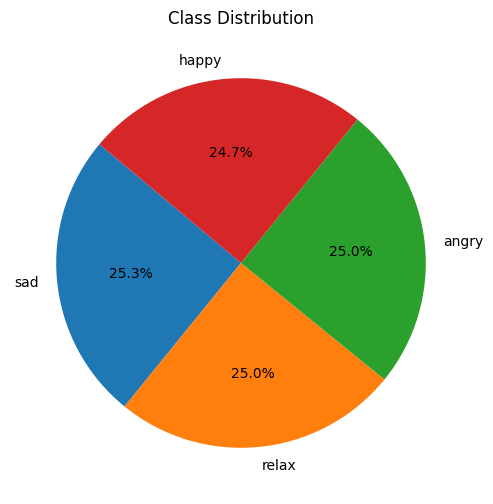

In [16]:
# Plot the pie chart
plt.figure(figsize=(8, 6))  # Optional: adjust the size of the chart
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()


### *Correlation Matrix*

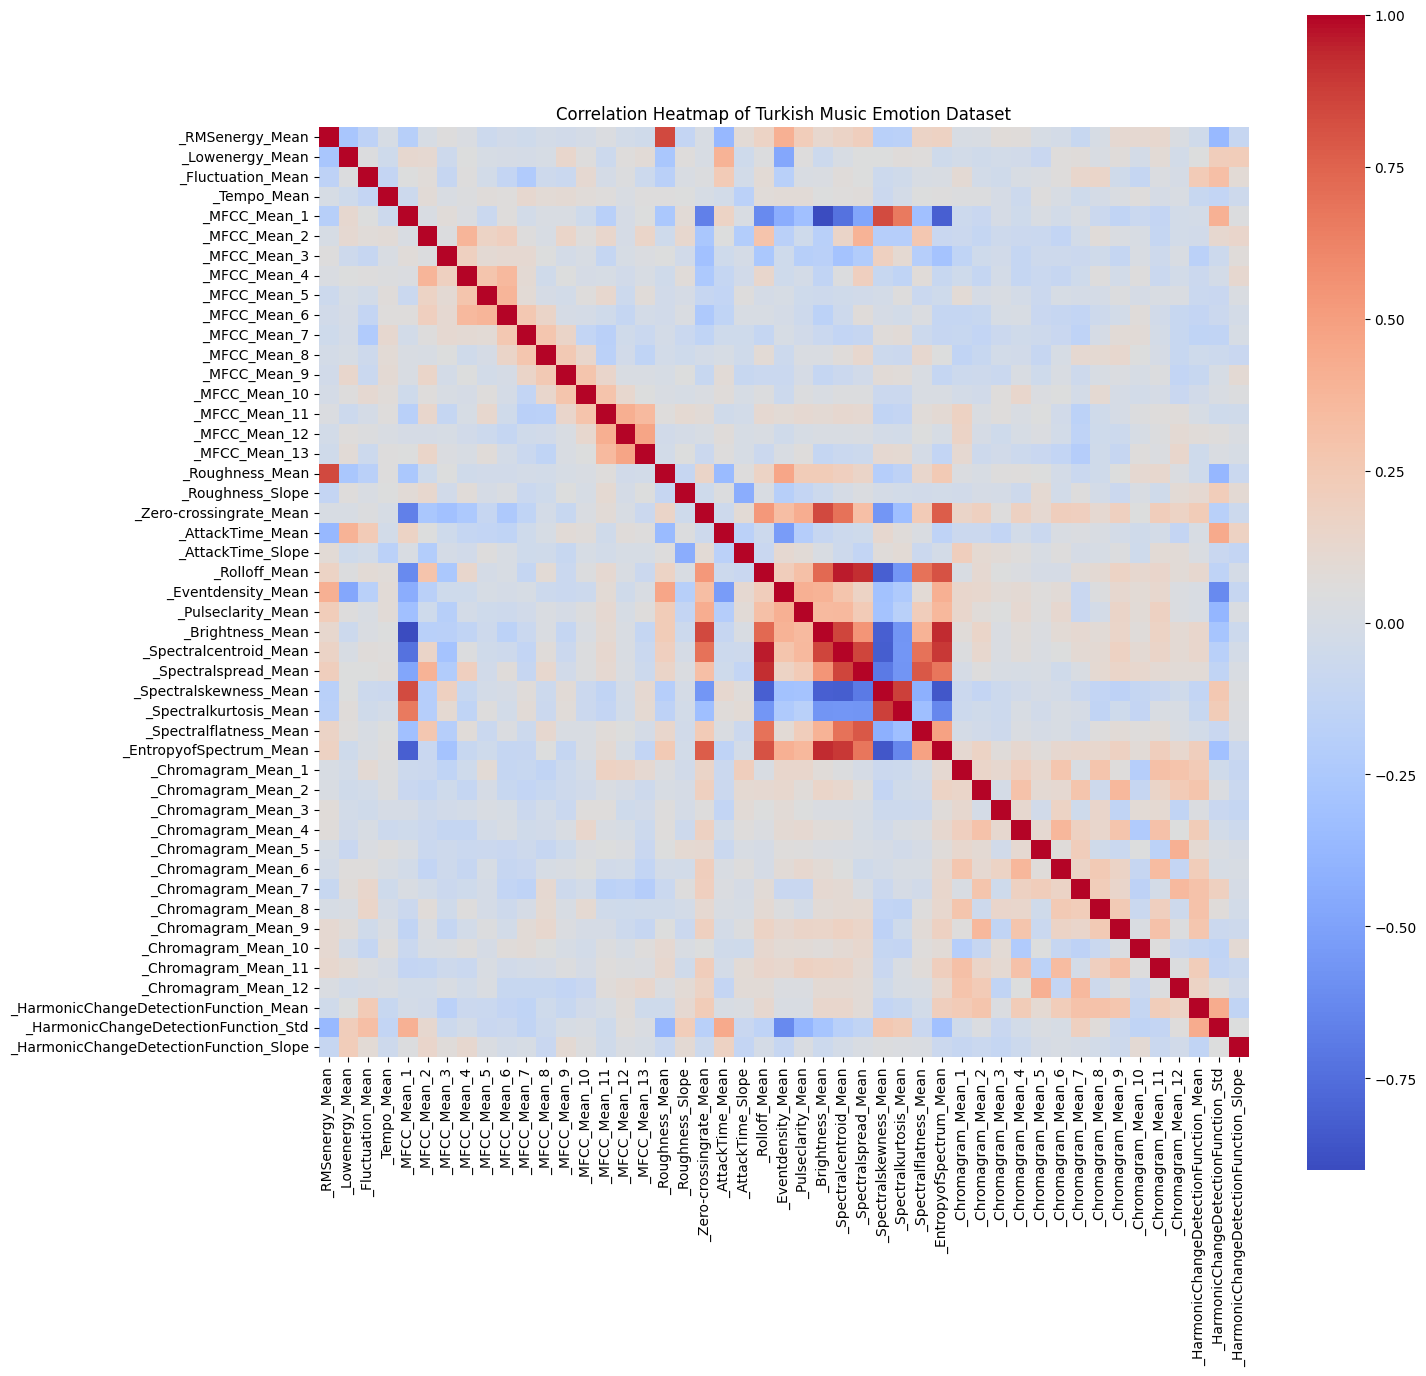

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation = cleaned_data.iloc[:, 1:].corr()

# Plot the heatmap
plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Turkish Music Emotion Dataset')
ax = sns.heatmap(correlation, square=True, annot=False , fmt='.2f', linecolor='white', cmap='coolwarm')
plt.show()

**High Positive Correlation (Red Blocks):**
MFCC Features (e.g., _MFCC_Mean_1 to _MFCC_Mean_13) often show strong positive correlations with one another, forming a cluster of red blocks in the heatmap.
Chromagram Features (e.g., _Chromagram_Mean_1 to _Chromagram_Mean_12) also show strong positive correlations, suggesting these features capture similar information about pitch content.

**Low or No Correlation (White/Light Colors):**
Features like _Tempo_Mean and _RMSenergy_Mean may show weak correlations with other features (lighter colors), meaning they provide independent information.

**Features with Highest Negative Correlation:**
HarmonicChangeDetectionFunction_Mean and _MFCC_Mean_2: These may show a significant negative correlation, indicating that an increase in one feature corresponds to a decrease in the other.

# **Visualization**
---



### *Sound Parameter Distributions*

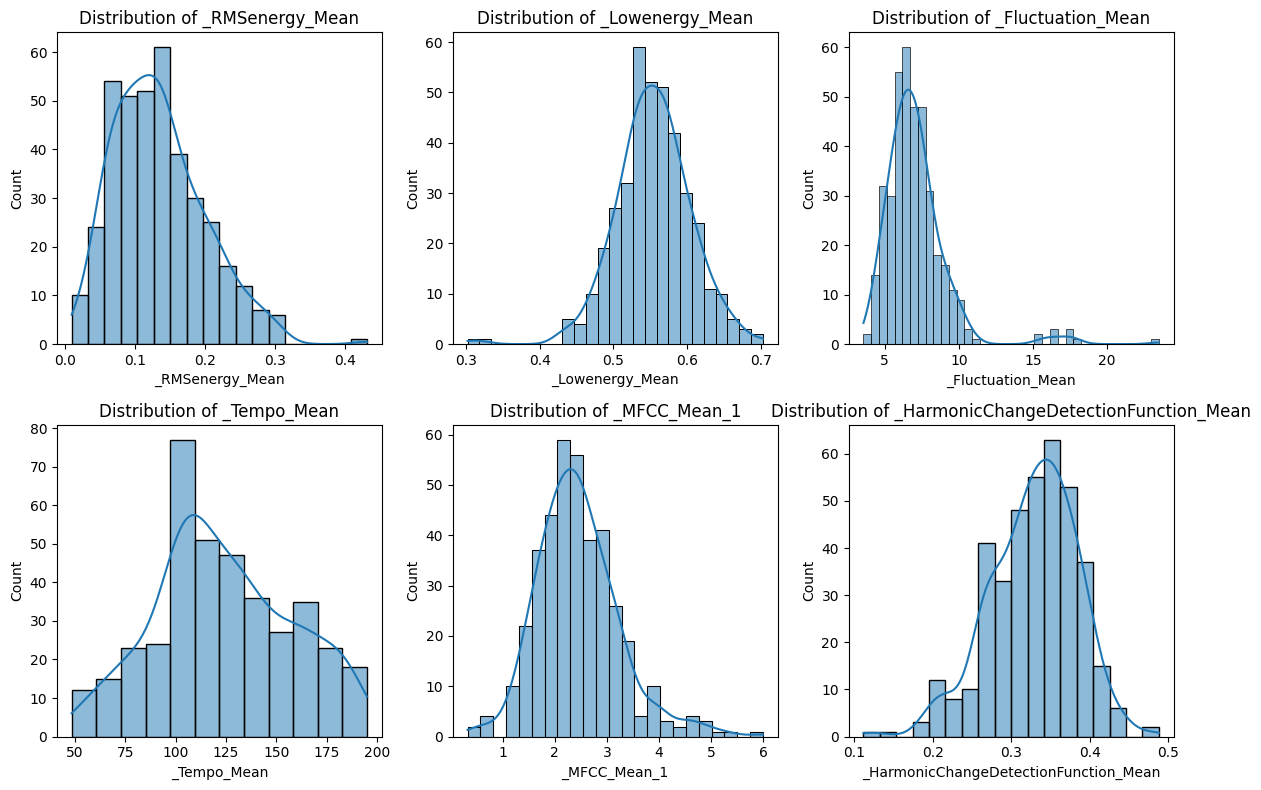

In [18]:
# Features to visualize
features = ['_RMSenergy_Mean', '_Lowenergy_Mean', '_Fluctuation_Mean', '_Tempo_Mean', '_MFCC_Mean_1', '_HarmonicChangeDetectionFunction_Mean', ]

# Plot distributions
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(cleaned_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

**1:Distribution of _RMSEnergy_Mean:**
The histogram shows the distribution of RMS Energy across the dataset. Most values are concentrated between 0.1 and 0.2, with fewer tracks having very low or very high RMS energy. RMS Energy represents the root mean square of the audio signal, which is a measure of loudness.

**2: Distribution of _Lowenergy_Mean:**
This plot represents the distribution of Low Energy. The majority of the values are centered around 0.5. Low energy is typically used to indicate tracks that have more quiet or calm sections, and this distribution suggests most songs exhibit moderate low energy.

**3: Distribution of _Fluctuation_Mean:**
The Fluctuation feature shows a right-skewed distribution, with a majority of the values concentrated around 5-10. This indicates that most songs have a similar fluctuation level, with fewer tracks showing higher fluctuation levels. Fluctuation is often used to measure how much the energy in a song varies over time.

**4: Distribution of _Tempo_Mean:**
This plot displays the distribution of Tempo (in beats per minute) across the dataset. There’s a peak around 100-125 BPM, indicating that many songs have tempos within this range, which aligns with common pop music tempos.

**5: Distribution of _MFCC_Mean_1:**
The histogram of the first MFCC (Mel Frequency Cepstral Coefficient) indicates a normal distribution centered around 3-4. MFCCs are used to capture the timbral texture of a song, and this specific coefficient may represent low-frequency characteristics in the audio.

**6:Distribution of _HarmonicChangeDetectionFunction_Mean:**
This graph shows the distribution of Harmonic Change Detection, with most values between 0.2 and 0.4. The feature likely measures how frequently harmonic changes occur in a song, with this distribution indicating that most songs exhibit moderate harmonic changes.

### *Box Plot*

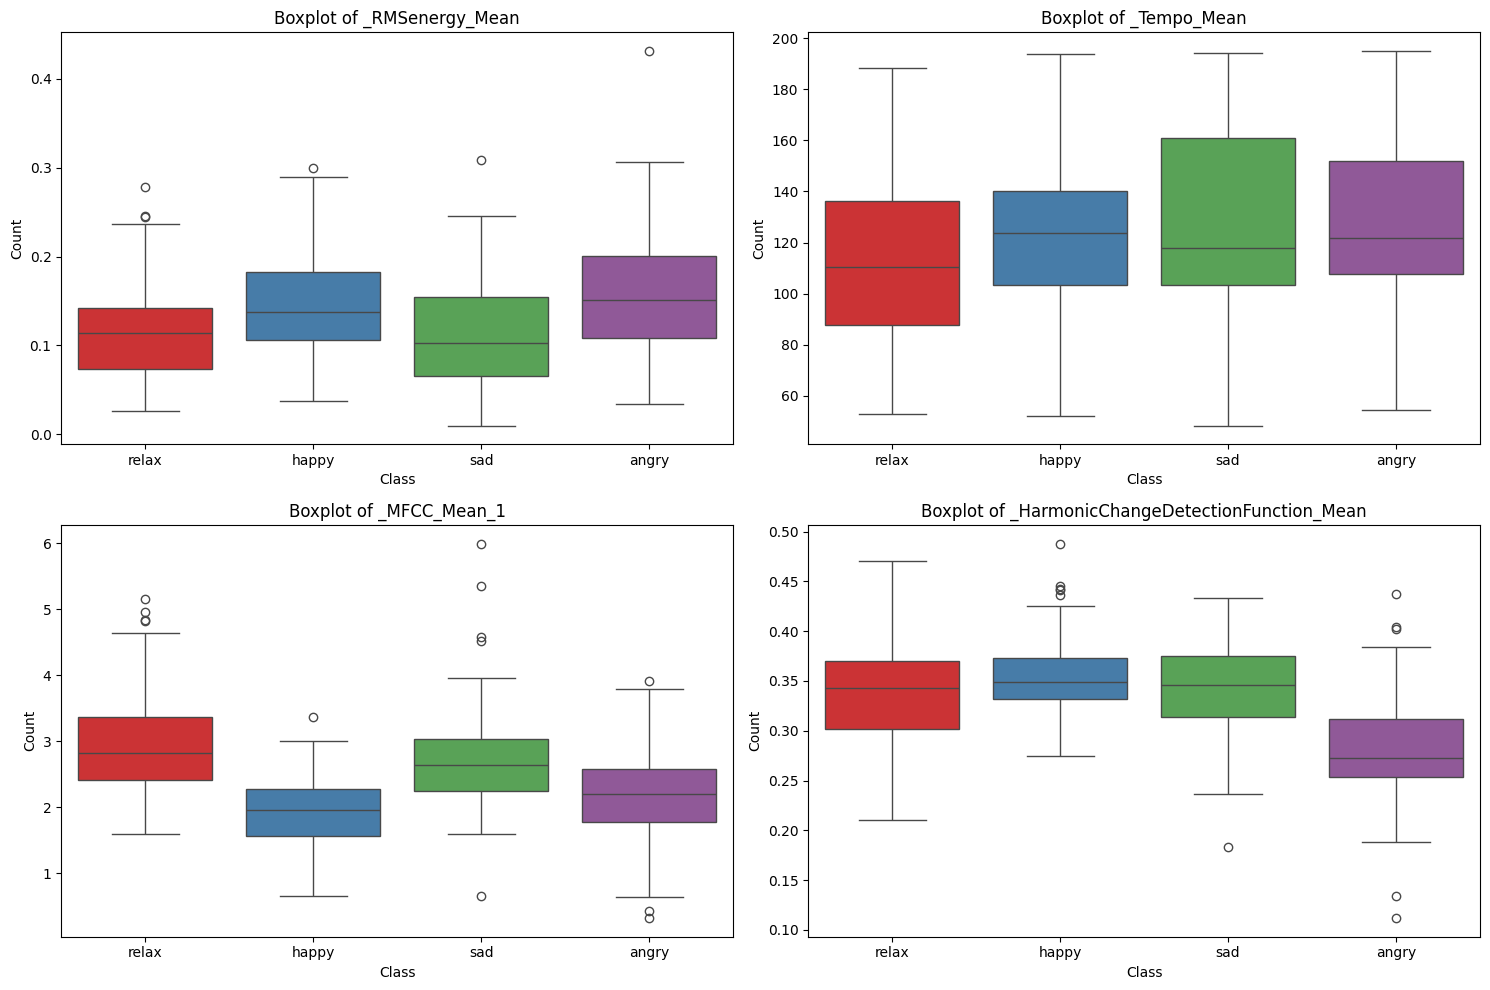

In [19]:
# Step 4: Create Boxplot and Violin plot
selected_features = ['_RMSenergy_Mean', '_Tempo_Mean', '_MFCC_Mean_1', '_HarmonicChangeDetectionFunction_Mean']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
palette = "Set1"
# Plot boxplots for each selected feature
for i, feature in enumerate(selected_features):
    sns.boxplot(x='Class', y=feature, data=cleaned_data, ax=axes[i//2, i%2], palette=palette)
    axes[i//2, i%2].set_title(f'Boxplot of {feature}')
    axes[i//2, i%2].set_ylabel('Count')

plt.tight_layout()
plt.show()



 **Each box plot helps us understand how the values for each feature vary within each class, as well as how they compare across different classes.**


**1. Boxplot of _RMSenergy_Mean:**
 RMS (Root Mean Square) energy, which represents the loudness or energy in the music.

The median energy levels for the classes are similar, though angry has a slightly higher median than the other classes.

The happy and relax classes have very compact distributions, indicating low variability in energy within these classes.

The angry class has a wider spread, suggesting more variation in energy levels.
There are a few outliers in all classes except for sad.

**2. Boxplot of _Tempo_Mean:**
 Tempo, which refers to the speed of the music.


The sad class has a higher median tempo compared to the other classes, indicating that sad music in this dataset tends to have a faster tempo.

The relax and angry classes have similar tempo distributions, with relax having a slightly higher median.

The happy class has a lower median tempo, with a more compact distribution.
There is substantial variability in tempo across the classes, with sad showing the largest variation and happy being more consistent.

**3. Boxplot of _MFCC_Mean_1:**
MFCC (Mel-Frequency Cepstral Coefficient), which captures the timbral (tone color) aspects of the audio.

The relax class has the highest median MFCC value, indicating a potentially different timbral quality in this type of music.

The happy class has the lowest median MFCC values, indicating a distinct difference in timbre compared to the other classes.

The sad and angry classes have similar distributions but still show some differences in their median values.

All classes exhibit a few outliers, especially the angry and relax classes.

**4. Boxplot of _HarmonicChangeDetectionFunction_Mean:**
Harmonic change detection function, which measures harmonic variation in the music.

The relax class has a higher median for harmonic changes, indicating that relaxing music has more consistent harmonic changes.

The happy class has a slightly lower median harmonic change value, while the sad and angry classes are similar but with slightly higher variability.

There are more outliers in the happy class compared to other classes, indicating some music tracks in this class have more extreme harmonic change values.


### *Violin Plot*

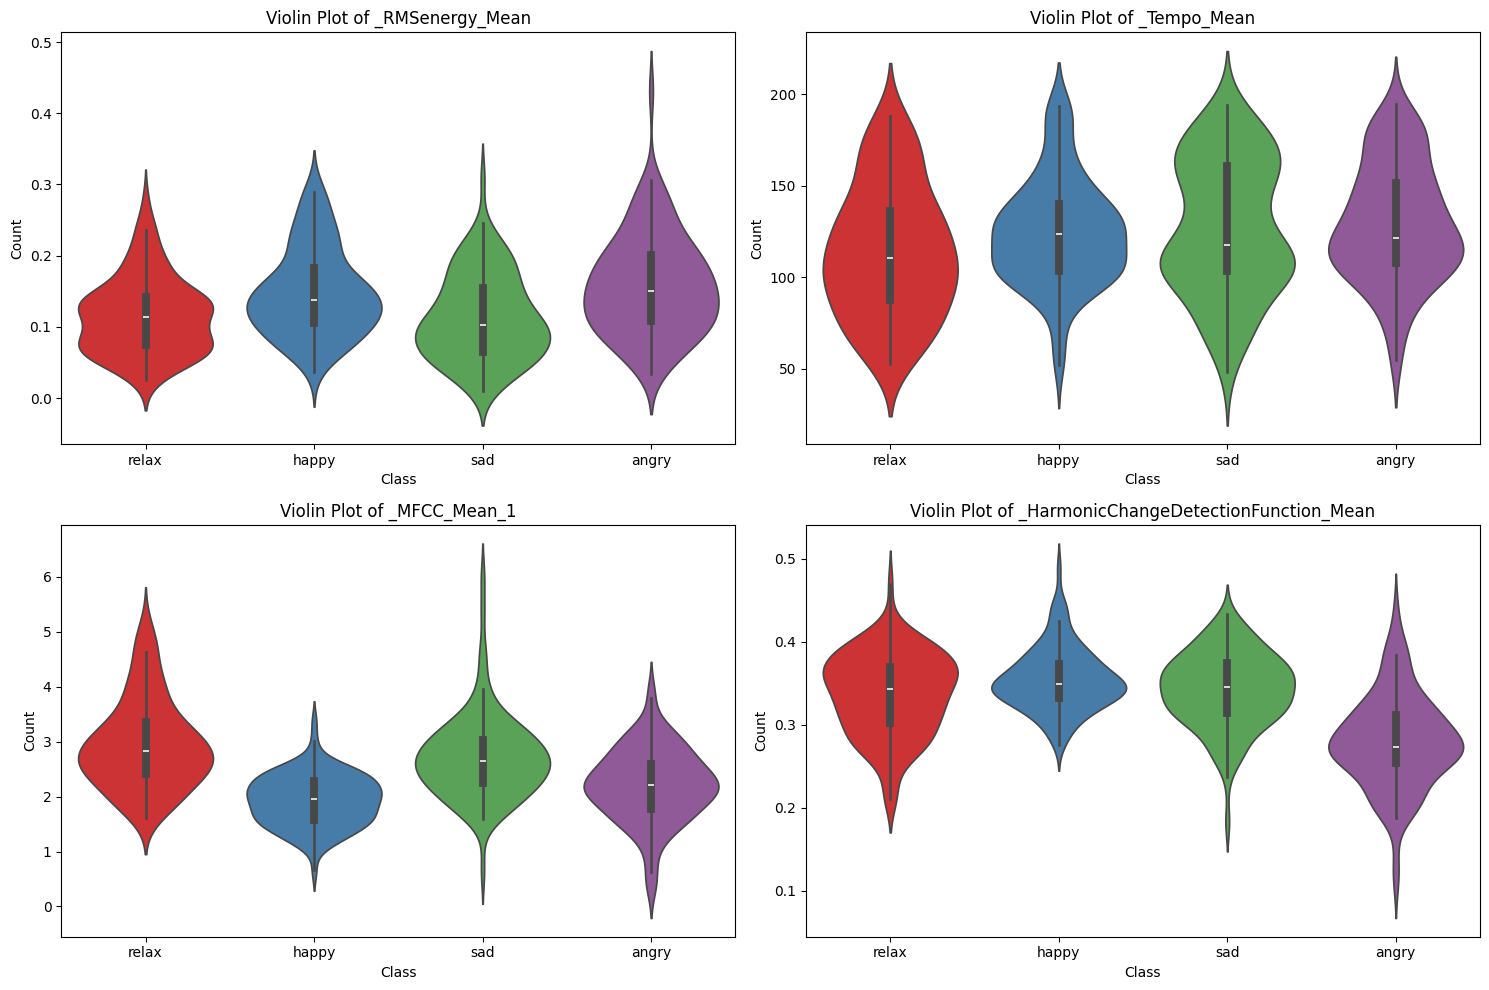

In [20]:
# Violin Plot
# Select a subset of features for the violin plots
# We choose features across different aspects: energy, tempo, MFCC, and harmonic changes
selected_features = ['_RMSenergy_Mean', '_Tempo_Mean', '_MFCC_Mean_1', '_HarmonicChangeDetectionFunction_Mean']

# Create violin plots for the selected features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Define a color palette for the classes
palette = "Set1"  # You can try other color palettes like 'Set1', 'coolwarm', etc.

for i, feature in enumerate(selected_features):
    sns.violinplot(x='Class', y=feature, data=cleaned_data, ax=axes[i//2, i%2], palette=palette)
    axes[i//2, i%2].set_title(f'Violin Plot of {feature}')
    axes[i//2, i%2].set_ylabel('Count')  # Optionally, set the y-axis label as 'Count'

plt.tight_layout()
plt.show()



**A violin plot combines the characteristics of a box plot and a kernel density plot, giving more insight into the data's distribution, particularly the density of the values.**


**1. Violin Plot of _RMSenergy_Mean:**

The distribution of the _RMSenergy_Mean feature is similar across the four classes, with some slight differences in the density.

The relax and happy classes have a more compact distribution, suggesting that most values for these classes are centered around the median.

Angry and sad have more spread in their distributions, particularly for the angry class, which shows a broader range of energy values.

Outliers: The width of the plot indicates where the data points are concentrated. Angry shows a peak in density around a slightly higher value of _RMSenergy_Mean compared to other classes.

**2. Violin Plot of _Tempo_Mean:**

Sad music tends to have the highest median tempo and displays a broader range in the distribution, suggesting a variety of tempos in sad music.

Relax and angry music have a relatively similar distribution in terms of tempo, with medians around the same values.

Happy music has the narrowest distribution in terms of tempo, indicating that happy music tends to have a more consistent, slower tempo.

Class Separation: The separation between sad and other classes (particularly happy) in terms of tempo is noticeable, which could indicate that tempo is an important distinguishing feature between these emotional categories.

**3.Violin Plot of _MFCC_Mean_1:**


The relax class has the highest median and a broad distribution of values, suggesting more variability in the timbral aspects of relaxing music.

Happy music shows a compact distribution with the lowest median, meaning it tends to have more consistent MFCC values.

The angry and sad classes have overlapping distributions, though sad has a slightly broader spread of values.

Class Separation: There is some separation between relax and happy music based on the MFCC values, which could be helpful for classifying these emotions.

**4. Violin Plot of _HarmonicChangeDetectionFunction_Mean:**

The relax class has a higher median for harmonic changes, with a somewhat compact distribution, indicating a consistent degree of harmonic change across these songs.

The happy and sad classes have similar distributions, though happy shows more peaks in the density, indicating areas where certain harmonic change values are more common.

Angry music has a lower median harmonic change with a wider distribution, suggesting more variability in the harmonic structure of this type of music.

Outliers: In the happy class, there are notable peaks in the density plot, indicating frequent occurrences of certain harmonic change values, while angry shows more scattered, varying harmonic changes.

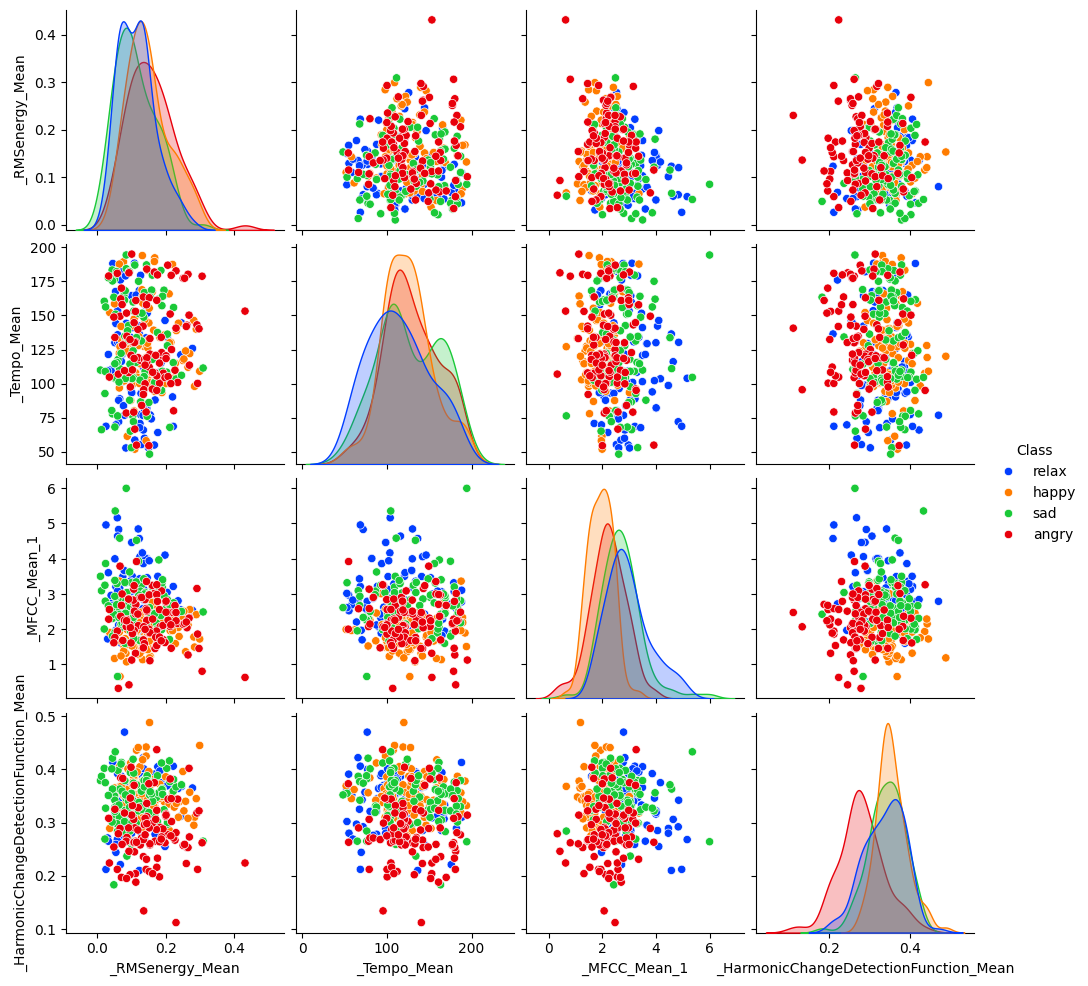

In [21]:
# Since pair plots can be very heavy for the browser to render if we use all features,
# we'll select a subset of features for the pair plot
pairplot_features = selected_features + ['Class']

# Create pair plots for the selected features
sns.pairplot(data=cleaned_data[pairplot_features], hue='Class', palette='bright')
plt.show()

**The pair plot helps visualize both the individual distributions of the features as well as the pairwise relationships between them.**

**1. Diagonal Plots (KDE Plots - Kernel Density Estimation):**

The diagonal of the pair plot shows the distribution of each individual feature for each class. These plots represent the density distribution (or KDE) of each feature across the four classes

**_RMSenergy_Mean:**

The happy and relax classes have more compact distributions, while the angry and sad classes show broader ranges.
Angry music tends to have slightly higher energy levels compared to other classes, and the KDE for relax shows a higher concentration around lower values.

**_Tempo_Mean:**

The sad class exhibits a broader distribution, indicating a wider range of tempo values, while happy music tends to have a more compact distribution around slower tempos.
Relax and angry classes show some overlap, with similar tempo distributions.

**_MFCC_Mean_1:**

Relax music has the highest MFCC values, followed by angry, with happy having the lowest values.
The happy class has a more concentrated distribution, while sad music shows a broader range.

**_HarmonicChangeDetectionFunction_Mean:**

The relax class has the highest harmonic change values, with happy showing a slightly lower but compact distribution.
Angry and sad have similar distributions but lower values overall.




**2. Off-Diagonal Plots (Scatter Plots):**

These scatter plots show pairwise relationships between features, with each class color-coded. They help visualize how different features correlate with each other for the different classes.

**_RMSenergy_Mean vs. _Tempo_Mean:**

There's no clear separation between classes in this relationship, as data points for all classes are overlapping.

A slight negative correlation can be observed across all classes, meaning that as RMSenergy decreases, Tempo tends to increase for some classes.

**_RMSenergy_Mean vs. _MFCC_Mean_1:**

There's a slight positive correlation between energy and MFCC values, especially for relax and angry classes.

The happy class has lower MFCC values, and its relationship with energy is less clear.

**_RMSenergy_Mean vs. _HarmonicChangeDetectionFunction_Mean:**

There is no strong relationship between energy and harmonic changes. The classes are mixed, with some clustering around similar values of harmonic changes.

**_Tempo_Mean vs. _MFCC_Mean_1:**

The scatter plot shows that relax and angry classes have a broad range of MFCC and tempo values, while happy is more concentrated in the lower range of both features.

Sad music shows more spread, particularly in terms of tempo.

**_Tempo_Mean vs. _HarmonicChangeDetectionFunction_Mean:**

The relationship between tempo and harmonic changes shows some separation between relax and happy classes, with happy having lower harmonic changes and tempo values, and relax having higher harmonic changes.

**_MFCC_Mean_1 vs. _HarmonicChangeDetectionFunction_Mean:**

There's no clear trend between MFCC and harmonic change values, but we do observe that relax music has higher values for both features, while happy and sad show lower values.

### *Feature Engineering*

In this part, the only categorical variable (emotion) in the dataset is encoded for the model building process.

In [22]:
# Encode the 'Class' column(categorical to numerical)
LabelEncoder = LabelEncoder()
cleaned_data['Class_encoded'] = LabelEncoder.fit_transform(cleaned_data['Class'])

### **The Neural Network Model**

Purpose: A neural network model is a machine learning algorithm that is often used for classification tasks. In your case, it is likely being used to classify music into categories ("angry", "sad", "happy" and "relax" .) based on features such as tempo, energy, etc.

### *Data Preparation*

Split the data into features (X) and target (y), then split them into training and testing sets:

In [23]:
# Split the data into features and target
X = cleaned_data.drop(['Class', 'Class_encoded'], axis=1)
y = cleaned_data['Class_encoded']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)



In [24]:
# Convert target variables to one-hot encoding for neural networks
y_train_nn = to_categorical(y_train)
y_test_nn = to_categorical(y_test)


In [25]:
# Set the random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


#### *Defining and building the model*

In [26]:
# Build the Neural Network Model
model = Sequential()

# Layer 1: Add seed to kernel_initializer for reproducibility
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu',
                kernel_regularizer=l2(0.001),
                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))  # Consistent weight initialization
model.add(BatchNormalization())
model.add(Dropout(0.3, seed=42))  # Set seed for Dropout

# Layer 2
model.add(Dense(128, kernel_regularizer=l2(0.001),
                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.3, seed=42))  # Set seed for Dropout

# Layer 3
model.add(Dense(64, kernel_regularizer=l2(0.001),
                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.3, seed=42))  # Set seed for Dropout

# Output Layer
model.add(Dense(y_train_nn.shape[1], activation='softmax',
                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))


#### *Compiling the model*

In [27]:
# Compile the model with the Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Set early stopping (no randomness here)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#### *Training the model*

In [29]:
# Train the model
history = model.fit(X_train, y_train_nn, epochs=100, batch_size=32, validation_data=(X_test, y_test_nn),
                    callbacks=[early_stopping], shuffle=False)  # Disable shuffling

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.4048 - loss: 1.9665 - val_accuracy: 0.6154 - val_loss: 1.5198
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5703 - loss: 1.5271 - val_accuracy: 0.6795 - val_loss: 1.3721
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7147 - loss: 1.1460 - val_accuracy: 0.7692 - val_loss: 1.2710
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7636 - loss: 1.0174 - val_accuracy: 0.7821 - val_loss: 1.2034
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7759 - loss: 0.8781 - val_accuracy: 0.8333 - val_loss: 1.1414
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7863 - loss: 0.8648 - val_accuracy: 0.8462 - val_loss: 1.0868
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8067 - loss: 0.8652 - val_accuracy: 0.8590 - val_loss: 1.0320
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8258 - loss: 0.7902 - val_accuracy: 0.8718 - 

#### *Model Evaluation*

In [30]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_nn)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8954 - loss: 0.6428 
Test Accuracy: 88.46%


#### *Visualizing the training process*
Plot the training and validation accuracy over epochs to see if the model is improving gradually.

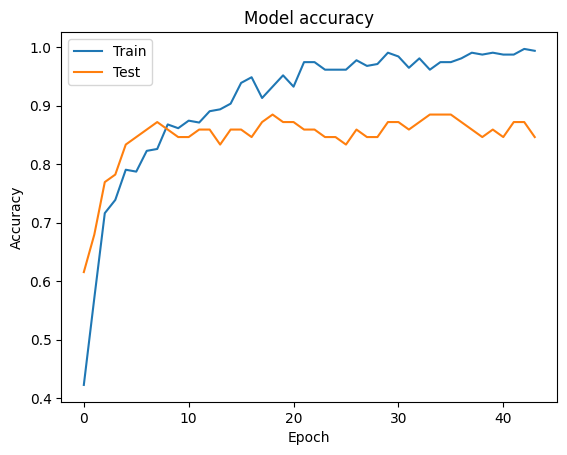

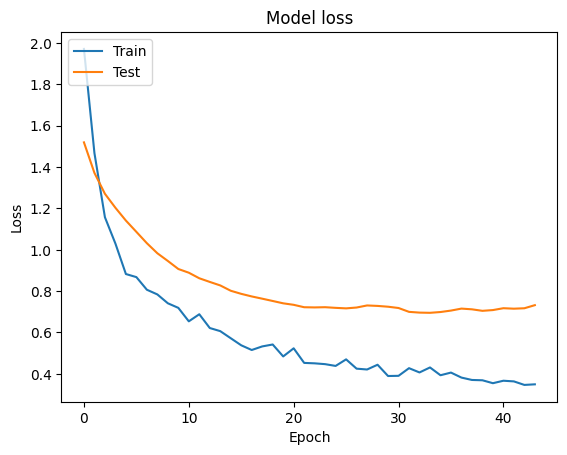

In [31]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Model Accuracy**: This metric shows the percentage of correct predictions made by the model compared to the total number of predictions.

**Training Accuracy (Blue Line):**
The training accuracy starts around 0.4 and quickly increases as the number of epochs progresses.
Around epoch 15, the accuracy stabilizes above 0.9, indicating that the model is learning effectively and performing well on the training data.
The slight fluctuations in the training curve after epoch 15 suggest the model continues to adjust its parameters, but overall it maintains high accuracy.

**Test Accuracy (Orange Line):**
The test accuracy begins similarly to the training accuracy but starts to plateau at around epoch 10.
After reaching a peak close to 0.9, the test accuracy remains relatively stable but is consistently lower than the training accuracy, which might suggest some overfitting—the model performs slightly better on the training set than on the unseen test data.
This gap between the training and test accuracies suggests the model has learned well but may benefit from additional regularization or other strategies to reduce overfitting.


**Model Loss**

In the first few epochs (around 1 to 3), both the training loss (blue line) and test loss (orange line) decrease rapidly. This indicates that the model is learning and generalizing well.
By epoch 3, the test loss reaches its minimum value (around 1.0), and this is likely the optimal point where the model achieves the best generalization to unseen data.
Epoch 3 is the ideal stopping point because the test loss reaches its lowest value, and the model generalizes best here (indicated by the 88% accuracy).
Continuing beyond epoch 3 leads to overfitting, where the model performs increasingly well on the training set but deteriorates on the test set, as evidenced by the widening gap between the training and test loss lines.

##### *Confusion Matrix*

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


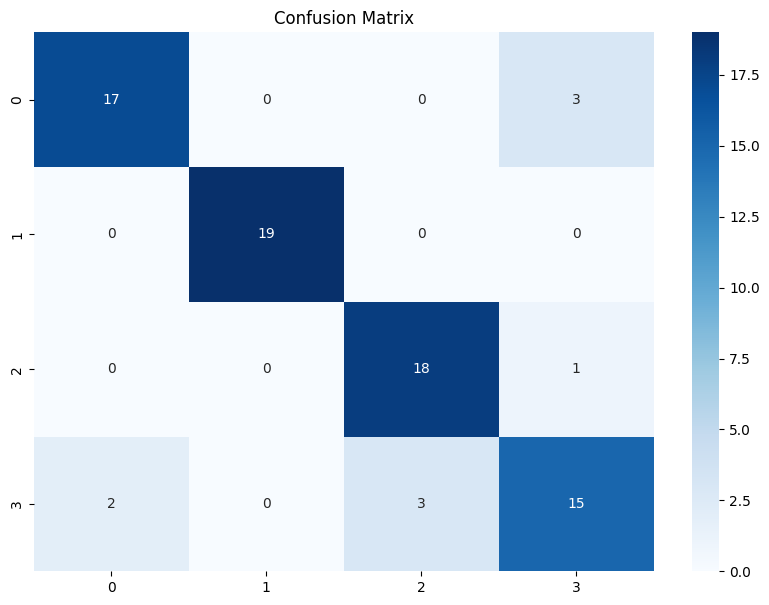

In [32]:
# Confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

A confusion matrix is used to evaluate the performance of a classification model by comparing the predicted labels to the actual labels. It displays the true positive, true negative, false positive, and false negative predictions made by the model for each class. Helps you understand where your model is making mistakes (e.g., predicting too many false positives for a certain emotion) and how well it's performing overall.

**1. True Positives (TP):**
1:The diagonal elements represent the correctly classified instances (where predicted and actual labels match). For example, Class 0 correctly predicted 17 times, Class 1 predicted correctly 19 times, and so on.

**2. False Positives (FP):**
Instances where a label is incorrectly predicted as a certain class. For example, Class 3 was misclassified 3 times as Class 2.

**3. False Negatives (FN):**
These occur when a label is predicted as another class but should have been classified as the original class. For example, Class 0 was misclassified as Class 3 3 times.

**4. Precision:**
Precision is calculated by taking the ratio of true positives to the sum of true positives and false positives. High precision means fewer false positives.

**5. Recall:**
Recall is the ratio of true positives to the sum of true positives and false negatives. High recall means fewer false negatives.

**6. Confusion Matrix Overview:**
0, 1, 2, 3 represent the classes (which could correspond to emotions or categories like "angry," "happy," etc.).
The darker the color, the higher the number of correct classifications for that class.
The matrix helps evaluate how well the model is performing for each class, showing strengths and weaknesses in classification.

**7. Misclassification:**
Instances that are not on the diagonal represent misclassifications (i.e., false predictions). These are cases where the model predicted one class, but the actual label was another.



#### *Classification Report*

In [33]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       1.00      1.00      1.00        19
           2       0.86      0.95      0.90        19
           3       0.79      0.75      0.77        20

    accuracy                           0.88        78
   macro avg       0.89      0.89      0.89        78
weighted avg       0.88      0.88      0.88        78



### **The Random Forest Model**

**Random Forest** is an ensemble learning technique that constructs multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It is a robust and widely used machine learning algorithm, especially in classification tasks.

### *Import Libraries*

In [34]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### *Training the model*

In [35]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### *Make Predictions*

In [36]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

#### *Model Evaluation*

In [37]:
# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.8589743589743589


#### *Confusion Matrix*


Confusion Matrix:
 [[17  1  0  2]
 [ 0 19  0  0]
 [ 0  0 17  2]
 [ 1  1  4 14]]


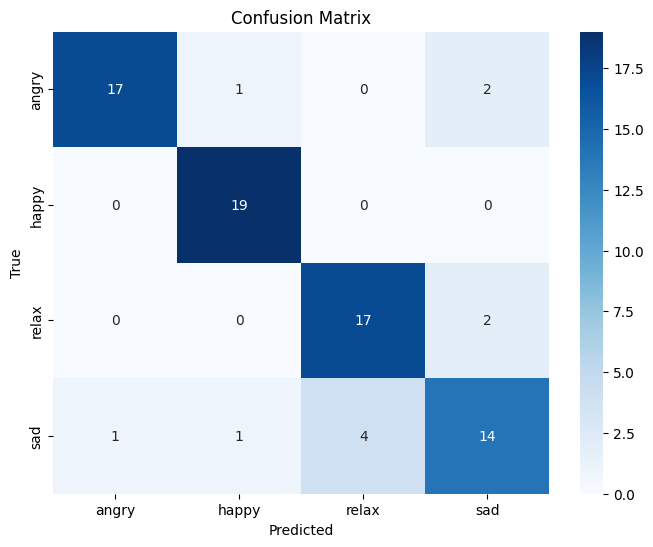

In [39]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LabelEncoder.classes_, yticklabels=LabelEncoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Details of the Analysis:**

**1:True Class: Angry (First Row):**

17 samples of the angry class were correctly predicted as angry (true positives).

1 sample of the angry class was incorrectly predicted as happy (false negative).

2 samples of the angry class were incorrectly predicted as sad (false negative).

**2:True Class: Happy (Second Row):**

19 samples of the happy class were correctly predicted as happy (true positives).

No happy samples were misclassified as another class.

**3:True Class: Relax (Third Row):**

17 samples of the relax class were correctly predicted as relax (true positives).

2 samples of the relax class were incorrectly predicted as sad (false negatives).

**4:True Class: Sad (Fourth Row):**

14 samples of the sad class were correctly predicted as sad (true positives).

1 sample of the sad class was incorrectly predicted as angry (false negative).

1 sample of the sad class was incorrectly predicted as happy (false negative).

4 samples of the sad class were incorrectly predicted as relax (false negatives).

#### *Classificassion Report*

In [40]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=LabelEncoder.classes_))


Classification Report:
               precision    recall  f1-score   support

       angry       0.94      0.85      0.89        20
       happy       0.90      1.00      0.95        19
       relax       0.81      0.89      0.85        19
         sad       0.78      0.70      0.74        20

    accuracy                           0.86        78
   macro avg       0.86      0.86      0.86        78
weighted avg       0.86      0.86      0.86        78



# **Signal Processing**
---



### Save the model, scaler  and LabelEncoder

In [ ]:
# Save the model and scaler
model.save('music_emotion_model.h5')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(LabelEncoder, 'LabelEncoder.joblib')

['LabelEncoder.joblib']